In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# x= 6 * np.random.rand(100,1)
# x

# Generate an own data set

In [7]:
x= 6 * np.random.rand(100,1)-3
y=0.5*x**2+1.5*x+2 + np.random.randn(100,1)
# The quadratic equation used is 0.5*X**2+1.5*x+2 + outliers

# Now lets visualize the dataset

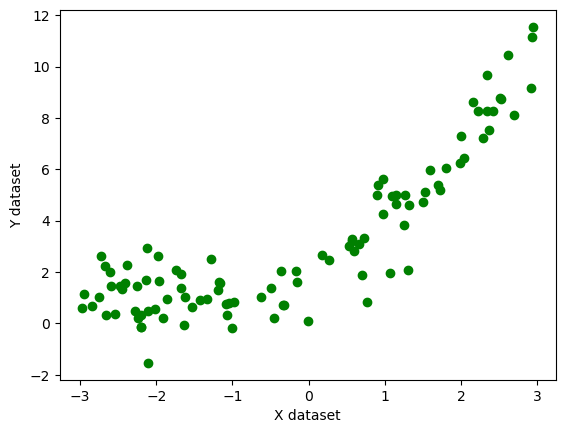

In [10]:
plt.scatter(x,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')
plt.show()

<Axes: >

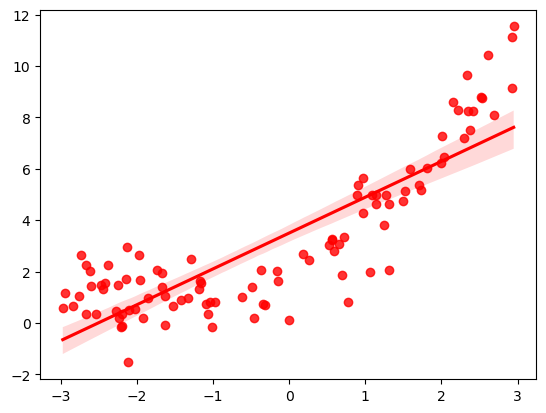

In [11]:
# Regression plot helps to analyse the probable linera regression line on the dataset before modelling it
import seaborn as sns
sns.regplot(x=x,y=y,color='r')

# do Train_Test split

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=46)

# Lets try implementing a simple linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

We are not doing scaling as the initial data is already in normal distribution. So the gradient descent will not have any problems

In [15]:
regression.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred=regression.predict(x_test)

In [17]:
from sklearn.metrics import r2_score

In [18]:
score=r2_score(y_test,y_pred)

In [19]:
score

0.6604630365341655

# Now lets plot the training dataset to see the best fit line

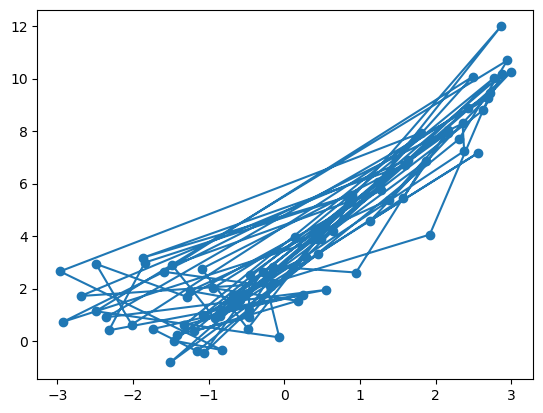

In [17]:
# plt.plot(x_train,y_train)
# plt.scatter(x_train,y_train)

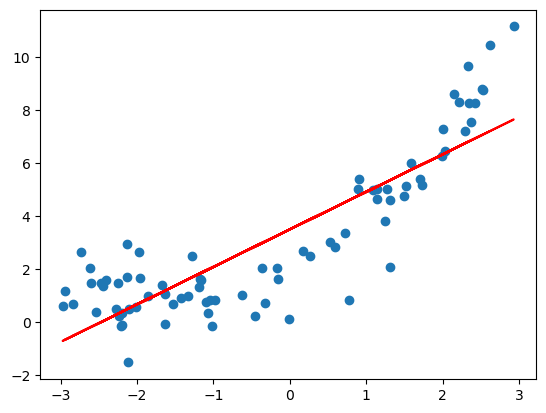

In [20]:
# Best fit line for the training data
plt.plot(x_train,regression.predict(x_train),'r')
plt.scatter(x_train,y_train)

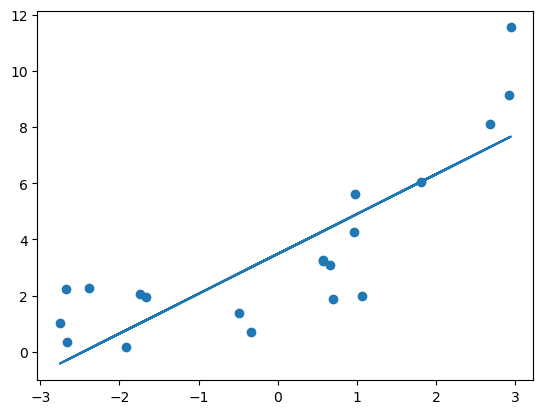

In [21]:
# Best fit line for the training data
plt.plot(x_test,regression.predict(x_test))
plt.scatter(x_test,y_test)

<Axes: >

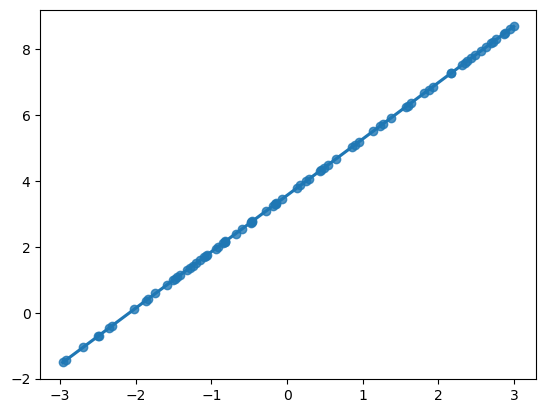

In [24]:
# import seaborn as sns
# sns.regplot(x=x_train,y=regression.predict(x_train))
# This cannot be used because there is no significance for regplot after applying the model

Polynomial Regression: As linear regression(y=a1x+c) didnot work,we will try polynomial regression (y=a1x+a2x^2+c)
and later if it doesnot give the suitable results then try with y=a1x+a2x^2+a3x^3+...+anx^n

So we apply the polynomial transformation

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
# y=1*a0+a1x+a2x^2.so in the above step we calculate(1,x,x^2). The bais 1 is nothing but x^0
# in the above step we determine the values for x and x square. 
x_test_poly=poly.transform(x_test)

In [24]:
x_train_poly
# Here the output is 1,x,x square

array([[ 1.00000000e+00, -1.42416287e+00,  2.02823987e+00],
       [ 1.00000000e+00,  1.24967254e+00,  1.56168146e+00],
       [ 1.00000000e+00, -1.18348323e+00,  1.40063255e+00],
       [ 1.00000000e+00,  2.53065856e+00,  6.40423274e+00],
       [ 1.00000000e+00, -1.63877610e-01,  2.68558709e-02],
       [ 1.00000000e+00, -1.47723095e-01,  2.18221129e-02],
       [ 1.00000000e+00,  2.15442296e+00,  4.64153829e+00],
       [ 1.00000000e+00,  1.52365830e+00,  2.32153460e+00],
       [ 1.00000000e+00,  2.21881066e+00,  4.92312075e+00],
       [ 1.00000000e+00, -2.12341100e+00,  4.50887426e+00],
       [ 1.00000000e+00, -2.19717510e+00,  4.82757843e+00],
       [ 1.00000000e+00, -1.17012036e+00,  1.36918165e+00],
       [ 1.00000000e+00, -2.72640104e+00,  7.43326265e+00],
       [ 1.00000000e+00, -2.13600498e+00,  4.56251729e+00],
       [ 1.00000000e+00, -2.47338732e+00,  6.11764481e+00],
       [ 1.00000000e+00,  2.33620205e+00,  5.45784000e+00],
       [ 1.00000000e+00, -1.52550282e+00

In [25]:
x_test_poly

array([[ 1.        , -2.37868906,  5.65816166],
       [ 1.        ,  0.9701746 ,  0.94123876],
       [ 1.        ,  0.97217062,  0.94511572],
       [ 1.        , -2.75087188,  7.56729612],
       [ 1.        ,  0.65820065,  0.43322809],
       [ 1.        ,  2.91948408,  8.52338731],
       [ 1.        ,  0.69752795,  0.48654524],
       [ 1.        ,  2.94745824,  8.6875101 ],
       [ 1.        , -2.67118878,  7.13524951],
       [ 1.        , -1.73558986,  3.01227216],
       [ 1.        ,  2.68915954,  7.23157905],
       [ 1.        ,  0.56833492,  0.32300459],
       [ 1.        , -0.48986828,  0.23997094],
       [ 1.        , -1.66889599,  2.78521381],
       [ 1.        ,  1.8051794 ,  3.25867265],
       [ 1.        , -1.91702342,  3.67497878],
       [ 1.        , -2.66333331,  7.0933443 ],
       [ 1.        ,  0.56663141,  0.32107115],
       [ 1.        ,  1.06206684,  1.12798597],
       [ 1.        , -0.34001143,  0.11560777]])

In [26]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
# Here teh coeeficients are determined
y_predict=regression.predict(x_test_poly)
score=r2_score(y_test,y_predict)

In [27]:
score

0.8756514682125136

In [28]:
regression.coef_

array([[0.        , 1.53459863, 0.50142241]])

In [29]:
regression.intercept_

array([1.86283427])

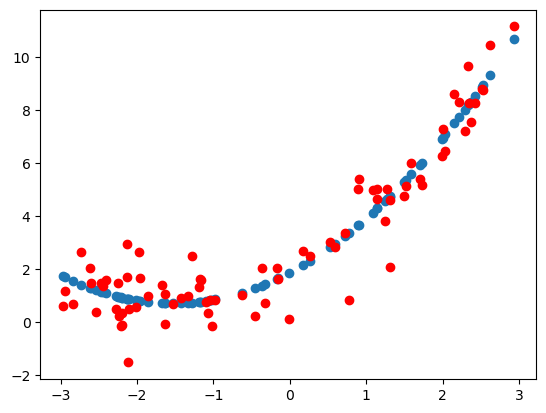

In [31]:
plt.scatter(x_train,regression.predict(x_train_poly))
# plot the otehr data points alos
plt.scatter(x_train,y_train,color='r')

# MAKE POLYNOMIAL DEGREE TO 3


In [32]:
poly=PolynomialFeatures(degree=3)
x_train_poly=poly.fit_transform(x_train)
# in the above step we determine the coeeficients wrt the x_train values.In the below steps we only apply the coeff to the x_test
# and y paarmeter is calculated. If again fit_transform is applied to x_test all coeeficients will be recalcualted for the x_test data
x_test_poly=poly.transform(x_test)
x_train_poly
# the output has x^1,x^2,x^3

array([[ 1.00000000e+00, -1.42416287e+00,  2.02823987e+00,
        -2.88854392e+00],
       [ 1.00000000e+00,  1.24967254e+00,  1.56168146e+00,
         1.95159044e+00],
       [ 1.00000000e+00, -1.18348323e+00,  1.40063255e+00,
        -1.65762512e+00],
       [ 1.00000000e+00,  2.53065856e+00,  6.40423274e+00,
         1.62069264e+01],
       [ 1.00000000e+00, -1.63877610e-01,  2.68558709e-02,
        -4.40107593e-03],
       [ 1.00000000e+00, -1.47723095e-01,  2.18221129e-02,
        -3.22363005e-03],
       [ 1.00000000e+00,  2.15442296e+00,  4.64153829e+00,
         9.99983666e+00],
       [ 1.00000000e+00,  1.52365830e+00,  2.32153460e+00,
         3.53722546e+00],
       [ 1.00000000e+00,  2.21881066e+00,  4.92312075e+00,
         1.09234728e+01],
       [ 1.00000000e+00, -2.12341100e+00,  4.50887426e+00,
        -9.57419320e+00],
       [ 1.00000000e+00, -2.19717510e+00,  4.82757843e+00,
        -1.06070351e+01],
       [ 1.00000000e+00, -1.17012036e+00,  1.36918165e+00,
      

In [33]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
y_predict=regression.predict(x_test_poly)
score=r2_score(y_test,y_predict)
score

0.8664194089079975

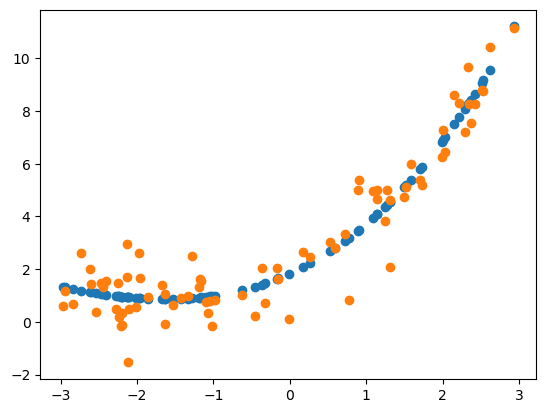

In [48]:
y1=regression.predict(x_train_poly)
plt.scatter(x_train,y1)
# plot the otehr data points alos
plt.scatter(x_train,y_train)

THERE IS NO MUCH DIFFERENCE IN SCORE BETWEEN DEGREE = 2 & 3. SO WE MAY TAKE DEGREE =2 ITSELF FOR ALL PREDICTIONS

# PREDICTION FOR NEW SET OF DATA

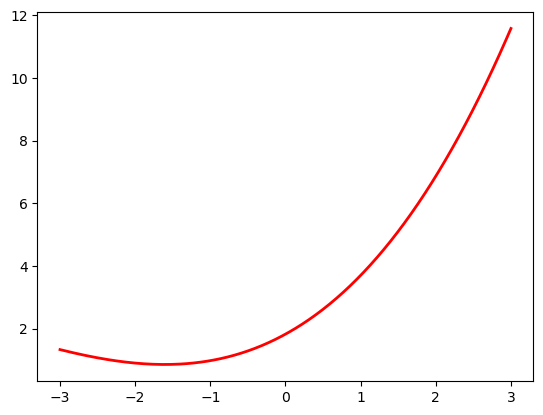

In [36]:
# linspace - linearspace
# For the new data we willnot train the model again. Bcz the model is already trained and teh r2 score is less
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
# x_new
y_predict1=regression.predict(x_new_poly)
plt.plot(x_new,y_predict1,"r-",linewidth=2)

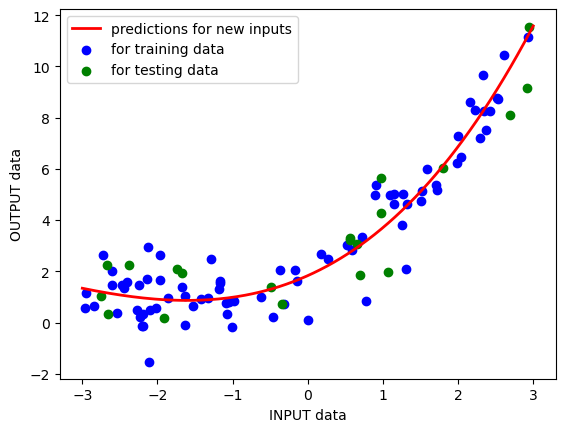

In [37]:
# Now lets plot all train,test and predicted values of new dataset
plt.plot(x_new,y_predict1,"r-",linewidth=2,label='predictions for new inputs')
plt.scatter(x_train,y_train,color='b',label='for training data')
plt.scatter(x_test,y_test,color='g',label='for testing data')
plt.xlabel('INPUT data')
plt.ylabel('OUTPUT data')
plt.legend()

# PIPELINES##############

In [93]:
from sklearn.pipeline import Pipeline

def poly_regression(n):
    x_new=np.linspace(-3,3,200).reshape(200,1)
    poly=PolynomialFeatures(degree=n)

    linearregression=LinearRegression()
#     The above two steps/transformation we apply in the form of a pipeline so it gets executed one after the other
    process=Pipeline([('PolynomialFeatures',poly),('LinearRegression',linearregression)])
    process.fit(x_train,y_train) # Here the polynomial features are craeted and the lineaer reg line is fit
    y_predict1=process.predict(x_new)
    plt.plot(x_new,y_predict1,"r-",linewidth=2,label='predictions for new inputs')
    plt.scatter(x_train,y_train,color='b',label='for training data')
    plt.scatter(x_test,y_test,color='g',label='for testing data')
    plt.xlabel('INPUT data')
    plt.ylabel('OUTPUT data')
    plt.legend()
    
# poly_regression(3)

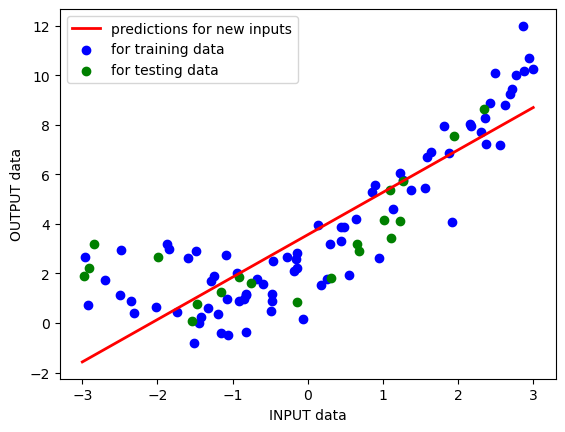

In [94]:
poly_regression(1)

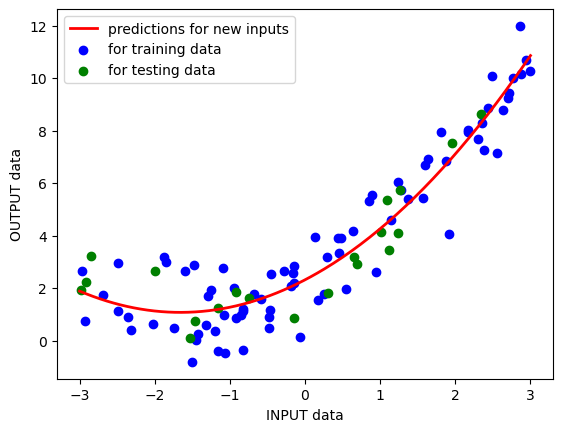

In [95]:
poly_regression(2)

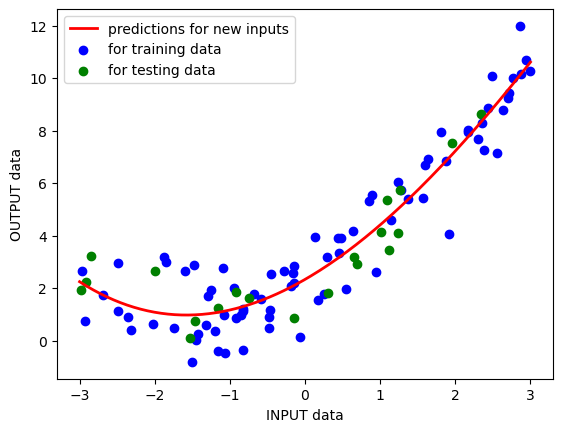

In [96]:
poly_regression(3)

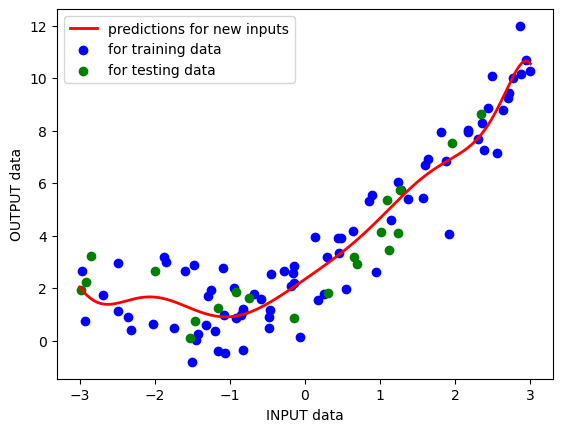

In [97]:
poly_regression(10)
# Overfitting

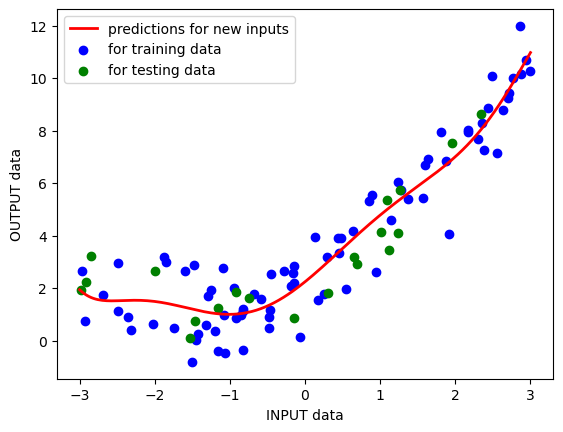

In [98]:
poly_regression(7)